In [4]:
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#movie = 'Control 050721'
#movie = 'CCA60'
movie ='140721'
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from  skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
from objects import movie_structure
from objects.movie_structure import gaussian_curvature, mean_curvature

from preprocessing import preprocessing
import importlib
import seaborn as sns

import json

# Loading a JSON file
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Saving data to a JSON file
def save_json(data, file_path):
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)

In [43]:
#movie = 'control'
movie ='140721'

DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'
gel_data = load_json(DATA_PATH + 'global/%s.json'%movie)

In [44]:
#reload modoule if changed
importlib.reload(movie_structure)

<module 'objects.movie_structure' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\objects\\movie_structure.py'>

In [45]:
gel = movie_structure.Movie.from_plate_and_height(gel_data)


In [46]:
import json

# Loading a JSON file
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Saving data to a JSON file
def save_json(data, file_path):
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)

# Example usage
file_path = r'C:\Users\amityu\Gel_Sheet_Data\global\control.txt'
output_path = r'C:\Users\amityu\Gel_Sheet_Data\global\control.json'
# Loading a JSON file
loaded_data = {
    "data_path": r'C:\Users\amityu\Gel_Sheet_Data\Control 050721\\',
    "name":      "Control 05/07/21"
}

print(loaded_data)

# Modifying the data
#loaded_data['new_key'] = 'new_value'

# Saving the modified data to a JSON file
save_json(loaded_data, output_path)


{'data_path': 'C:\\Users\\amityu\\Gel_Sheet_Data\\Control 050721\\\\', 'name': 'Control 05/07/21'}


In [47]:
def plane_correlation(plane1, plane2):
    f1 = plane1.flatten()
    f2 = plane2.flatten()
    mask_plane = ~np.bitwise_or(np.isnan(f1), np.isnan(f2))
    f1 = f1[mask_plane]
    f2 = f2[mask_plane]
    c = np.corrcoef(f1,f2)[0,1]
    return c

COrrelation between the intensity in the plane and surface as a function of time

In [48]:

correlation_list = []
time_list = []
mean_height_list = []
for tp in tqdm(gel.tp_list[0:-1:1]):
    try:
        plate = tp.get_plate_plane()
        height = tp.get_height_plane()
        correlation_list.append(plane_correlation(plate, height))
        time_list.append(tp.time)
        mean_height_list.append(np.nanmean(tp.height))
    except:
        pass


  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\amityu\AppData\Local\Temp\ipykernel_14524\2119859397.py:10: RuntimeWarning: Mean of empty slice
  mean_height_list.append(np.nanmean(tp.h

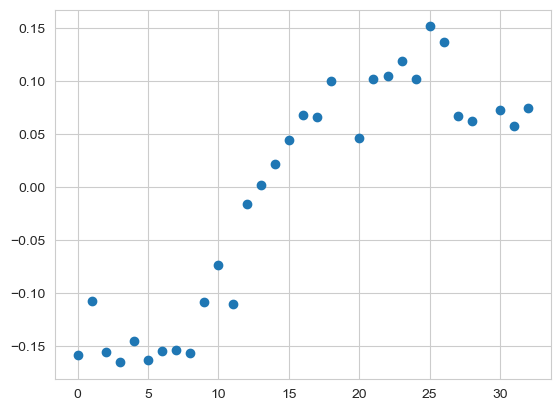

In [49]:

plt.scatter(time_list, correlation_list)

plt.show()

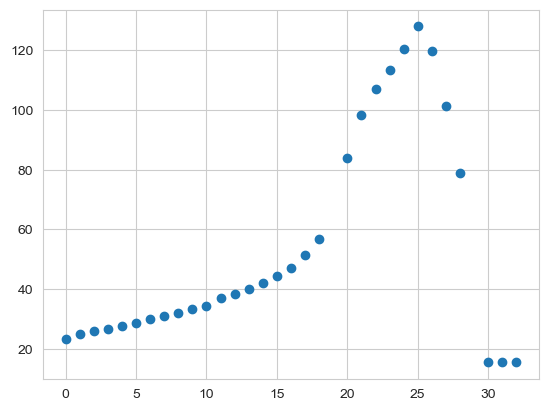

In [50]:

plt.scatter(time_list, mean_height_list)

plt.show()


correlation between intensity of plate and height of surface as a function of time


  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\amityu\AppData\Local\Temp\ipykernel_14524\1814023617.py:10: RuntimeWarning: Mean of empty slice
  mean_height_list.append(np.nanmean(tp.height))


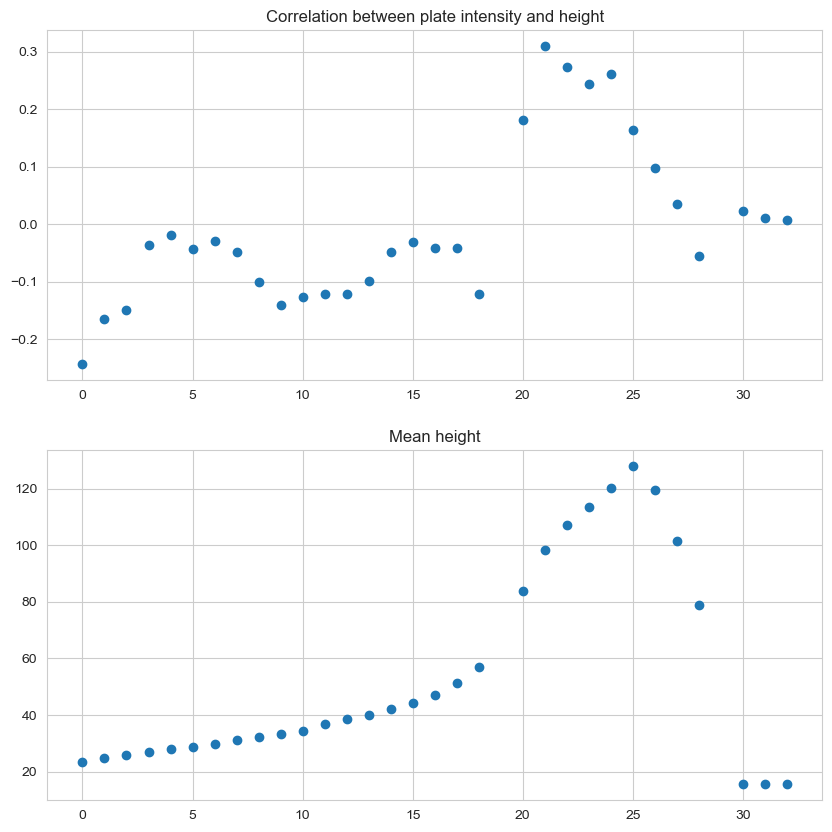

In [51]:
correlation_list = []
time_list = []
mean_height_list = []
for tp in tqdm(gel.tp_list[0:-1:1]):
    try:
        plate = tp.get_plate_plane()
        height = tp.get_height_plane()
        correlation_list.append(plane_correlation(plate, tp.height))
        time_list.append(tp.time)
        mean_height_list.append(np.nanmean(tp.height))
    except:
        pass


#make subplots
fig, ax = plt.subplots(2,1, figsize = (10,10))
ax[0].scatter(time_list, correlation_list)
ax[0].set_title('Correlation between plate intensity and height')
ax[1].scatter(time_list, mean_height_list)
ax[1].set_title('Mean height')
plt.show()


Correlation between plate intensity and height after a time gap


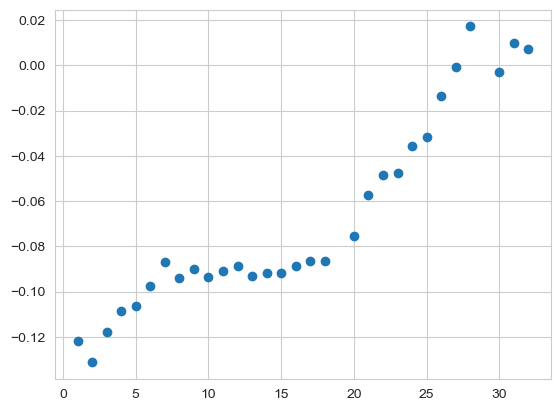

In [52]:
correlation_list = []
time_list = []
tp_list = gel.tp_list
t0_plate_intensity = tp_list[0].get_plate_plane()
for t in range(1, len(tp_list)):
    t1_height = tp_list[t].height
    correlation_list.append(plane_correlation(t0_plate_intensity, t1_height))
    time_list.append(tp_list[t].time)

plt.scatter(time_list, correlation_list)
plt.show()


